<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_quickdraw10('/content/sample_data/quickdraw10.npz')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 784)
(80000,)
(20000, 784)
(20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [10]:
##### Your Code Here #####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

def create_model(lr=0.001):
  opt = Adam(learning_rate=lr)
  model = Sequential([
    Dense(32, activation='relu', input_dim=784),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [11]:
model = create_model()

bt_32 = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.1266 - accuracy: 0.4065 - val_loss: 1.3782 - val_accuracy: 0.5275
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3028 - accuracy: 0.5537 - val_loss: 1.2442 - val_accuracy: 0.5884
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1576 - accuracy: 0.6123 - val_loss: 1.1192 - val_accuracy: 0.6268
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0903 - accuracy: 0.6316 - val_loss: 1.0986 - val_accuracy: 0.6334
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0612 - accuracy: 0.6421 - val_loss: 1.1297 - val_accuracy: 0.6419
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0436 - accuracy: 0.6469 - val_loss: 1.0734 - val_accuracy: 0.6470
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0130 - accuracy: 0.6585 - val_loss: 1.0512 - val_accuracy:

In [15]:
model = create_model()

bt_128 = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=128,
  validation_data=(X_test, y_test)
)

Epoch 1/15
625/625 [==============================] - 2s 3ms/step - loss: 3.1158 - accuracy: 0.3456 - val_loss: 1.5950 - val_accuracy: 0.4405
Epoch 2/15
625/625 [==============================] - 2s 3ms/step - loss: 1.4287 - accuracy: 0.5164 - val_loss: 1.2589 - val_accuracy: 0.5822
Epoch 3/15
625/625 [==============================] - 2s 3ms/step - loss: 1.1390 - accuracy: 0.6375 - val_loss: 1.0670 - val_accuracy: 0.6595
Epoch 4/15
625/625 [==============================] - 2s 3ms/step - loss: 1.0067 - accuracy: 0.6759 - val_loss: 0.9769 - val_accuracy: 0.6819
Epoch 5/15
625/625 [==============================] - 2s 3ms/step - loss: 0.9368 - accuracy: 0.6970 - val_loss: 0.9591 - val_accuracy: 0.7007
Epoch 6/15
625/625 [==============================] - 2s 3ms/step - loss: 0.8943 - accuracy: 0.7076 - val_loss: 0.8902 - val_accuracy: 0.7099
Epoch 7/15
625/625 [==============================] - 2s 3ms/step - loss: 0.8669 - accuracy: 0.7170 - val_loss: 0.9041 - val_accuracy: 0.7237
Epoch 

In [12]:
model = create_model()

bt_64 = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/15
1250/1250 [==============================] - 3s 2ms/step - loss: 2.7792 - accuracy: 0.3121 - val_loss: 1.4693 - val_accuracy: 0.4838
Epoch 2/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.3450 - accuracy: 0.5310 - val_loss: 1.2627 - val_accuracy: 0.5551
Epoch 3/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2140 - accuracy: 0.5829 - val_loss: 1.1647 - val_accuracy: 0.6089
Epoch 4/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1366 - accuracy: 0.6147 - val_loss: 1.1169 - val_accuracy: 0.6362
Epoch 5/15
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0951 - accuracy: 0.6316 - val_loss: 1.1087 - val_accuracy: 0.6452
Epoch 6/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.0650 - accuracy: 0.6422 - val_loss: 1.0552 - val_accuracy: 0.6598
Epoch 7/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.0420 - accuracy: 0.6509 - val_loss: 1.0325 - val_accuracy:

In [14]:
model = create_model()

bt_16 = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=16,
  validation_data=(X_test, y_test)
)

Epoch 1/15
5000/5000 [==============================] - 8s 2ms/step - loss: 1.8687 - accuracy: 0.4493 - val_loss: 1.3045 - val_accuracy: 0.5273
Epoch 2/15
5000/5000 [==============================] - 7s 1ms/step - loss: 1.3009 - accuracy: 0.5429 - val_loss: 1.2131 - val_accuracy: 0.5694
Epoch 3/15
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2313 - accuracy: 0.5692 - val_loss: 1.2095 - val_accuracy: 0.5743
Epoch 4/15
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1853 - accuracy: 0.5866 - val_loss: 1.1538 - val_accuracy: 0.6011
Epoch 5/15
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1363 - accuracy: 0.6066 - val_loss: 1.1279 - val_accuracy: 0.6172
Epoch 6/15
5000/5000 [==============================] - 8s 2ms/step - loss: 1.0785 - accuracy: 0.6320 - val_loss: 1.0512 - val_accuracy: 0.6553
Epoch 7/15
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0202 - accuracy: 0.6631 - val_loss: 1.0451 - val_accuracy:

In [13]:

model = create_model()

bt_8 = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=8,
  validation_data=(X_test, y_test)
)

Epoch 1/15
10000/10000 [==============================] - 15s 1ms/step - loss: 1.7922 - accuracy: 0.4349 - val_loss: 1.3992 - val_accuracy: 0.5019
Epoch 2/15
10000/10000 [==============================] - 14s 1ms/step - loss: 1.3417 - accuracy: 0.5342 - val_loss: 1.2765 - val_accuracy: 0.5283
Epoch 3/15
10000/10000 [==============================] - 14s 1ms/step - loss: 1.1286 - accuracy: 0.6225 - val_loss: 1.0204 - val_accuracy: 0.6730
Epoch 4/15
10000/10000 [==============================] - 14s 1ms/step - loss: 0.9715 - accuracy: 0.6894 - val_loss: 0.9236 - val_accuracy: 0.7042
Epoch 5/15
10000/10000 [==============================] - 14s 1ms/step - loss: 0.9381 - accuracy: 0.7036 - val_loss: 0.9218 - val_accuracy: 0.7121
Epoch 6/15
10000/10000 [==============================] - 14s 1ms/step - loss: 0.9262 - accuracy: 0.7087 - val_loss: 0.9071 - val_accuracy: 0.7179
Epoch 7/15
10000/10000 [==============================] - 16s 2ms/step - loss: 0.9080 - accuracy: 0.7150 - val_loss: 0

In [16]:
import seaborn as sns

batch_sizes = []

for exp, result in zip([bt_8, bt_16, bt_32,bt_64,bt_128], ["8_", "16_", "32_", "64__", "128__"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['batch_Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['batch_Size'] = df['batch_Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_Size
0,1.792225,0.434938,1.399196,0.50190,0,8_
1,1.341687,0.534200,1.276543,0.52830,1,8_
2,1.128622,0.622463,1.020386,0.67305,2,8_
3,0.971510,0.689350,0.923624,0.70415,3,8_
4,0.938142,0.703600,0.921806,0.71210,4,8_


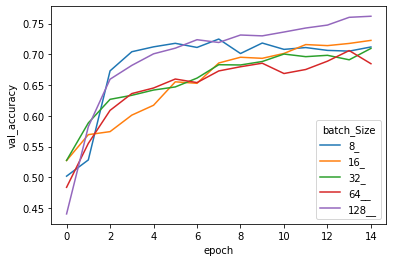

In [19]:
sns.lineplot(x='epoch', y='val_accuracy', hue='batch_Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [27]:
model = create_model(lr=0.25)

lr_lowest = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 18.5826 - accuracy: 0.1008 - val_loss: 6.5064 - val_accuracy: 0.0993
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 5.8232 - accuracy: 0.1015 - val_loss: 2.3316 - val_accuracy: 0.0989
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3353 - accuracy: 0.0979 - val_loss: 2.3637 - val_accuracy: 0.1002
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3326 - accuracy: 0.1000 - val_loss: 2.3523 - val_accuracy: 0.0989
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3323 - accuracy: 0.1002 - val_loss: 2.3305 - val_accuracy: 0.1007
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3318 - accuracy: 0.1002 - val_loss: 2.3504 - val_accuracy: 0.0993
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3334 - accuracy: 0.1018 - val_loss: 2.3491 - val_accuracy

In [28]:
model = create_model(lr=0.5)

lr_low = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 77.2767 - accuracy: 0.0996 - val_loss: 2.6456 - val_accuracy: 0.1001
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 9.2246 - accuracy: 0.0969 - val_loss: 2.3477 - val_accuracy: 0.1019
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3613 - accuracy: 0.0986 - val_loss: 2.3443 - val_accuracy: 0.0988
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3608 - accuracy: 0.0992 - val_loss: 2.3291 - val_accuracy: 0.1019
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3602 - accuracy: 0.0996 - val_loss: 2.3462 - val_accuracy: 0.1000
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3598 - accuracy: 0.1002 - val_loss: 2.3696 - val_accuracy: 0.0996
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1001 - val_loss: 2.3398 - val_accuracy

In [29]:
model = create_model(lr=0.75)

lr_med = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 746.3687 - accuracy: 0.0999 - val_loss: 68.6290 - val_accuracy: 0.0992
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 435.2841 - accuracy: 0.1005 - val_loss: 162.5449 - val_accuracy: 0.1001
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 17.7560 - accuracy: 0.1019 - val_loss: 162.6418 - val_accuracy: 0.0992
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3899 - accuracy: 0.0996 - val_loss: 162.5155 - val_accuracy: 0.1001
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3861 - accuracy: 0.0985 - val_loss: 162.5054 - val_accuracy: 0.0988
Epoch 6/15
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3900 - accuracy: 0.0982 - val_loss: 162.5052 - val_accuracy: 0.1001
Epoch 7/15
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3886 - accuracy: 0.0994 - val_loss: 162.57

In [30]:
model = create_model(lr=0.8)

lr_high = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 381.2614 - accuracy: 0.1009 - val_loss: 4077.7185 - val_accuracy: 0.1019
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 459.8205 - accuracy: 0.1008 - val_loss: 704.0747 - val_accuracy: 0.0988
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3916 - accuracy: 0.0987 - val_loss: 704.1310 - val_accuracy: 0.0993
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3897 - accuracy: 0.0980 - val_loss: 704.0668 - val_accuracy: 0.0993
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3917 - accuracy: 0.0993 - val_loss: 704.1401 - val_accuracy: 0.1019
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3906 - accuracy: 0.1000 - val_loss: 704.0719 - val_accuracy: 0.0993
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3920 - accuracy: 0.0989 - val_loss: 704.1

In [31]:
model = create_model(lr=0.9)

lr_highest = model.fit(
  X_train, y_train,
  epochs=15,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/15
2500/2500 [==============================] - 4s 2ms/step - loss: 305.0936 - accuracy: 0.1011 - val_loss: 2.4007 - val_accuracy: 0.0996
Epoch 2/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3984 - accuracy: 0.1000 - val_loss: 2.3897 - val_accuracy: 0.1001
Epoch 3/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3980 - accuracy: 0.1010 - val_loss: 2.3608 - val_accuracy: 0.1002
Epoch 4/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.4038 - accuracy: 0.1008 - val_loss: 2.4159 - val_accuracy: 0.1000
Epoch 5/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3996 - accuracy: 0.1027 - val_loss: 2.3463 - val_accuracy: 0.1001
Epoch 6/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.4005 - accuracy: 0.0992 - val_loss: 2.3883 - val_accuracy: 0.1001
Epoch 7/15
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3991 - accuracy: 0.0992 - val_loss: 2.4379 - val_accurac

In [32]:
batch_sizes = []

for exp, result in zip([lr_lowest, lr_low, lr_med, lr_high, lr_highest], [".25", ".50", ".75", "0.80", "0.90"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['learning_rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['learning_rate'] = df['learning_rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,learning_rate
0,18.582613,0.100825,6.506365,0.09935,0,.25
1,5.823158,0.101550,2.331576,0.09895,1,.25
2,2.335285,0.097888,2.363734,0.10020,2,.25
3,2.332596,0.100000,2.352314,0.09895,3,.25
4,2.332273,0.100175,2.330550,0.10075,4,.25


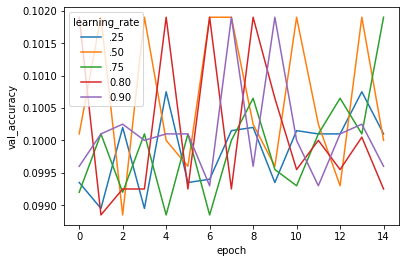

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='learning_rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [18]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.optimizers import Nadam


def create_model2(opt, lr=0.001):
  opt = opt(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model2(RMSprop, lr=.001)

RMSprop = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.7075 - accuracy: 0.5963 - val_loss: 1.1364 - val_accuracy: 0.6834
Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1243 - accuracy: 0.7216 - val_loss: 1.1900 - val_accuracy: 0.7217
Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0348 - accuracy: 0.7487 - val_loss: 1.0880 - val_accuracy: 0.7555
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9886 - accuracy: 0.7626 - val_loss: 0.9509 - val_accuracy: 0.7675
Epoch 5/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.9857 - accuracy: 0.7672 - val_loss: 1.0287 - val_accuracy: 0.7531
Epoch 6/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.9850 - accuracy: 0.7719 - val_loss: 1.0000 - val_accuracy: 0.7639
Epoch 7/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.9987 - accuracy: 0.7713 - val_loss: 1.1051 - val_accuracy

In [34]:
model = create_model2(Adadelta, lr=.001)

Adadelta = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 66.9039 - accuracy: 0.1110 - val_loss: 51.1111 - val_accuracy: 0.1235
Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 42.1439 - accuracy: 0.1356 - val_loss: 35.7613 - val_accuracy: 0.1444
Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 30.8395 - accuracy: 0.1575 - val_loss: 27.1055 - val_accuracy: 0.1606
Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 23.8718 - accuracy: 0.1761 - val_loss: 21.3550 - val_accuracy: 0.1761
Epoch 5/30
5000/5000 [==============================] - 7s 1ms/step - loss: 18.9338 - accuracy: 0.1906 - val_loss: 17.0907 - val_accuracy: 0.1921
Epoch 6/30
5000/5000 [==============================] - 7s 1ms/step - loss: 15.2020 - accuracy: 0.2022 - val_loss: 13.7981 - val_accuracy: 0.1998
Epoch 7/30
5000/5000 [==============================] - 7s 1ms/step - loss: 12.3169 - accuracy: 0.2085 - val_loss: 11.2421 -

In [35]:
model = create_model2(Adamax, lr=.001)

Adamax = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 2.3278 - accuracy: 0.3829 - val_loss: 1.4163 - val_accuracy: 0.4783
Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.3487 - accuracy: 0.5075 - val_loss: 1.2888 - val_accuracy: 0.5250
Epoch 3/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2614 - accuracy: 0.5424 - val_loss: 1.2667 - val_accuracy: 0.5472
Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.2051 - accuracy: 0.5657 - val_loss: 1.2015 - val_accuracy: 0.5678
Epoch 5/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1585 - accuracy: 0.5890 - val_loss: 1.1491 - val_accuracy: 0.5899
Epoch 6/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.1090 - accuracy: 0.6198 - val_loss: 1.1035 - val_accuracy: 0.6374
Epoch 7/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.0583 - accuracy: 0.6436 - val_loss: 1.0846 - val_accuracy:

In [36]:

model = create_model2(Ftrl, lr=.001)

Ftrl = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 8s 2ms/step - loss: 3.2537 - accuracy: 0.3525 - val_loss: 1.7687 - val_accuracy: 0.4336
Epoch 2/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.7014 - accuracy: 0.4503 - val_loss: 1.6272 - val_accuracy: 0.4674
Epoch 3/30
5000/5000 [==============================] - 9s 2ms/step - loss: 1.5982 - accuracy: 0.4828 - val_loss: 1.5494 - val_accuracy: 0.5011
Epoch 4/30
5000/5000 [==============================] - 11s 2ms/step - loss: 1.5282 - accuracy: 0.5104 - val_loss: 1.4846 - val_accuracy: 0.5270
Epoch 5/30
5000/5000 [==============================] - 11s 2ms/step - loss: 1.4674 - accuracy: 0.5373 - val_loss: 1.4279 - val_accuracy: 0.5501
Epoch 6/30
5000/5000 [==============================] - 9s 2ms/step - loss: 1.4124 - accuracy: 0.5584 - val_loss: 1.3799 - val_accuracy: 0.5670
Epoch 7/30
5000/5000 [==============================] - 9s 2ms/step - loss: 1.3637 - accuracy: 0.5732 - val_loss: 1.3344 - val_accurac

In [37]:
model = create_model2(Nadam, lr=.001)

Nadam = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.9220 - accuracy: 0.3909 - val_loss: 1.2912 - val_accuracy: 0.5801
Epoch 2/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.2533 - accuracy: 0.5806 - val_loss: 1.1558 - val_accuracy: 0.5990
Epoch 3/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.1509 - accuracy: 0.6133 - val_loss: 1.1588 - val_accuracy: 0.5993
Epoch 4/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.1124 - accuracy: 0.6322 - val_loss: 1.0764 - val_accuracy: 0.6574
Epoch 5/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.0707 - accuracy: 0.6470 - val_loss: 1.0926 - val_accuracy: 0.6375
Epoch 6/30
5000/5000 [==============================] - 8s 2ms/step - loss: 1.0368 - accuracy: 0.6523 - val_loss: 1.0280 - val_accuracy: 0.6447
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.0163 - accuracy: 0.6560 - val_loss: 1.0038 - val_accuracy

In [39]:
model = create_model2(Adagrad, lr=.001)

Adagrad = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 7s 1ms/step - loss: 3.4782 - accuracy: 0.1859 - val_loss: 2.2690 - val_accuracy: 0.2077
Epoch 2/30
5000/5000 [==============================] - 7s 1ms/step - loss: 2.2080 - accuracy: 0.2173 - val_loss: 2.1630 - val_accuracy: 0.2312
Epoch 3/30
5000/5000 [==============================] - 6s 1ms/step - loss: 2.1190 - accuracy: 0.2472 - val_loss: 2.0947 - val_accuracy: 0.2583
Epoch 4/30
5000/5000 [==============================] - 7s 1ms/step - loss: 2.0518 - accuracy: 0.2758 - val_loss: 2.0346 - val_accuracy: 0.2853
Epoch 5/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.9949 - accuracy: 0.2963 - val_loss: 1.9871 - val_accuracy: 0.3013
Epoch 6/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.9463 - accuracy: 0.3132 - val_loss: 1.9461 - val_accuracy: 0.3173
Epoch 7/30
5000/5000 [==============================] - 7s 1ms/step - loss: 1.9080 - accuracy: 0.3257 - val_loss: 1.9122 - val_accuracy:

In [40]:
for exp, result in zip([RMSprop, Adadelta, Adagrad, Adamax, Ftrl,Nadam], ["RMSprop", "Adadelta", "Adagrad", "Adamax", "Ftrl","Nadam"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimzers'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimzers'] = df['Optimzers'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,learning_rate,Optimzers
0,18.582613,0.100825,6.506365,0.09935,0,.25,nan
1,5.823158,0.101550,2.331576,0.09895,1,.25,nan
2,2.335285,0.097888,2.363734,0.10020,2,.25,nan
3,2.332596,0.100000,2.352314,0.09895,3,.25,nan
4,2.332273,0.100175,2.330550,0.10075,4,.25,nan


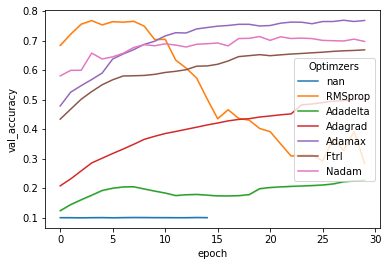

In [41]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimzers', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation is an algorithm being used to train neural networks where once initialized, and weights are provided to neurons. Outputs are captured based on inputs which are passed through the neurons.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


